<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [32]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [34]:
data = pd.read_csv('./train.csv')

In [35]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [36]:
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [37]:
# Размер датасета
data.shape

(5282, 20)

In [38]:
#Информация о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [39]:
# Считаем nan-значения в каждой колонке
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

#### Решаем проблему с колонкой TotalSpent
Можно заметить, что колонка TotalSpent имеет тип object, хотя в ней лежат числа.
Как оказалось, имелись символы пробелов вместо значений. Я заменила их nan-ами и удалила из датасета.

In [63]:
# Убедилась, что в колонке есть пробелы вместо числовых значений. Вывод - количество строк, у которых в колонке TotalSpent пробел.
data.TotalSpent[data.TotalSpent == ' '].count()

0

In [65]:
# Заменяем пробелы на nan-ы и удаляем из датасета
data.TotalSpent = data.TotalSpent.replace(' ', np.nan).astype(float)
data = data.dropna()
data.reset_index(drop=True, inplace=True)

#### Разделяем на X и y (матрицу признаков и целевую переменную)
Кроме того, сразу разделим категориальные и числовые признаки

In [66]:
numeric_data = data[num_cols]
cat_data = data[cat_cols]

y = data[target_col]
X = data[feature_cols]
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### Распределение численных признаков

In [67]:
import seaborn as sns
sns.set_theme(style="whitegrid")

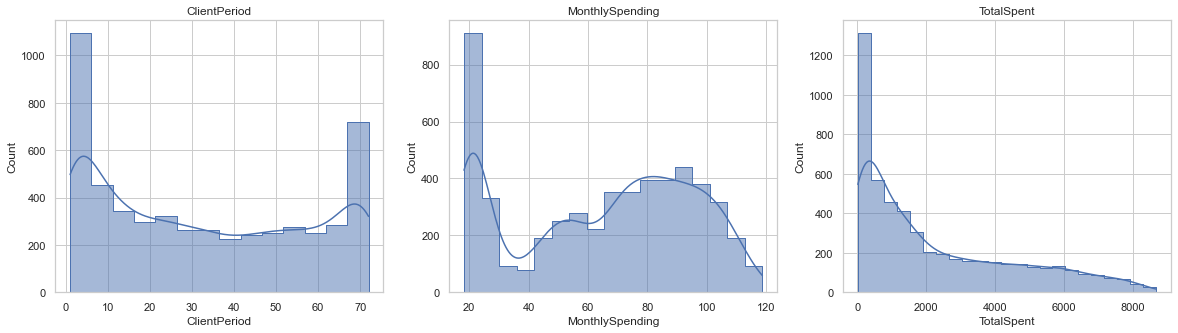

In [68]:
# Гистограмма
plt.figure(figsize=(20, 5))

for i, feature in enumerate(num_cols):
    ax = plt.subplot(1, 3, i + 1)

    sns.histplot(data[feature], kde=True, element="step")
    
    plt.title(feature)
    
plt.show()

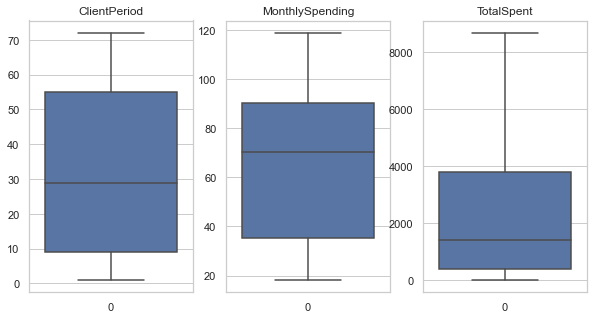

In [69]:
# Строим boxplot
plt.figure(figsize=(10, 5))

for i, feature in enumerate(num_cols):
    ax = plt.subplot(1, 3, i + 1)

    sns.boxplot(data=data[feature])
    
    plt.title(feature)
    
plt.show()

### Диаграммы для категориальных признаков

In [70]:
# Считаем, сколько раз встречается каждое значение в каждом категориальном признаке
for cat_feature in cat_data:
    print(cat_feature)
    print(data[cat_feature].value_counts())
    print()

Sex
Male      2651
Female    2622
Name: Sex, dtype: int64

IsSeniorCitizen
0    4431
1     842
Name: IsSeniorCitizen, dtype: int64

HasPartner
No     2704
Yes    2569
Name: HasPartner, dtype: int64

HasChild
No     3676
Yes    1597
Name: HasChild, dtype: int64

HasPhoneService
Yes    4754
No      519
Name: HasPhoneService, dtype: int64

HasMultiplePhoneNumbers
No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64

HasInternetService
Fiber optic    2341
DSL            1795
No             1137
Name: HasInternetService, dtype: int64

HasOnlineSecurityService
No                     2611
Yes                    1525
No internet service    1137
Name: HasOnlineSecurityService, dtype: int64

HasOnlineBackup
No                     2331
Yes                    1805
No internet service    1137
Name: HasOnlineBackup, dtype: int64

HasDeviceProtection
No                     2316
Yes                    1820
No internet service    1137
Na

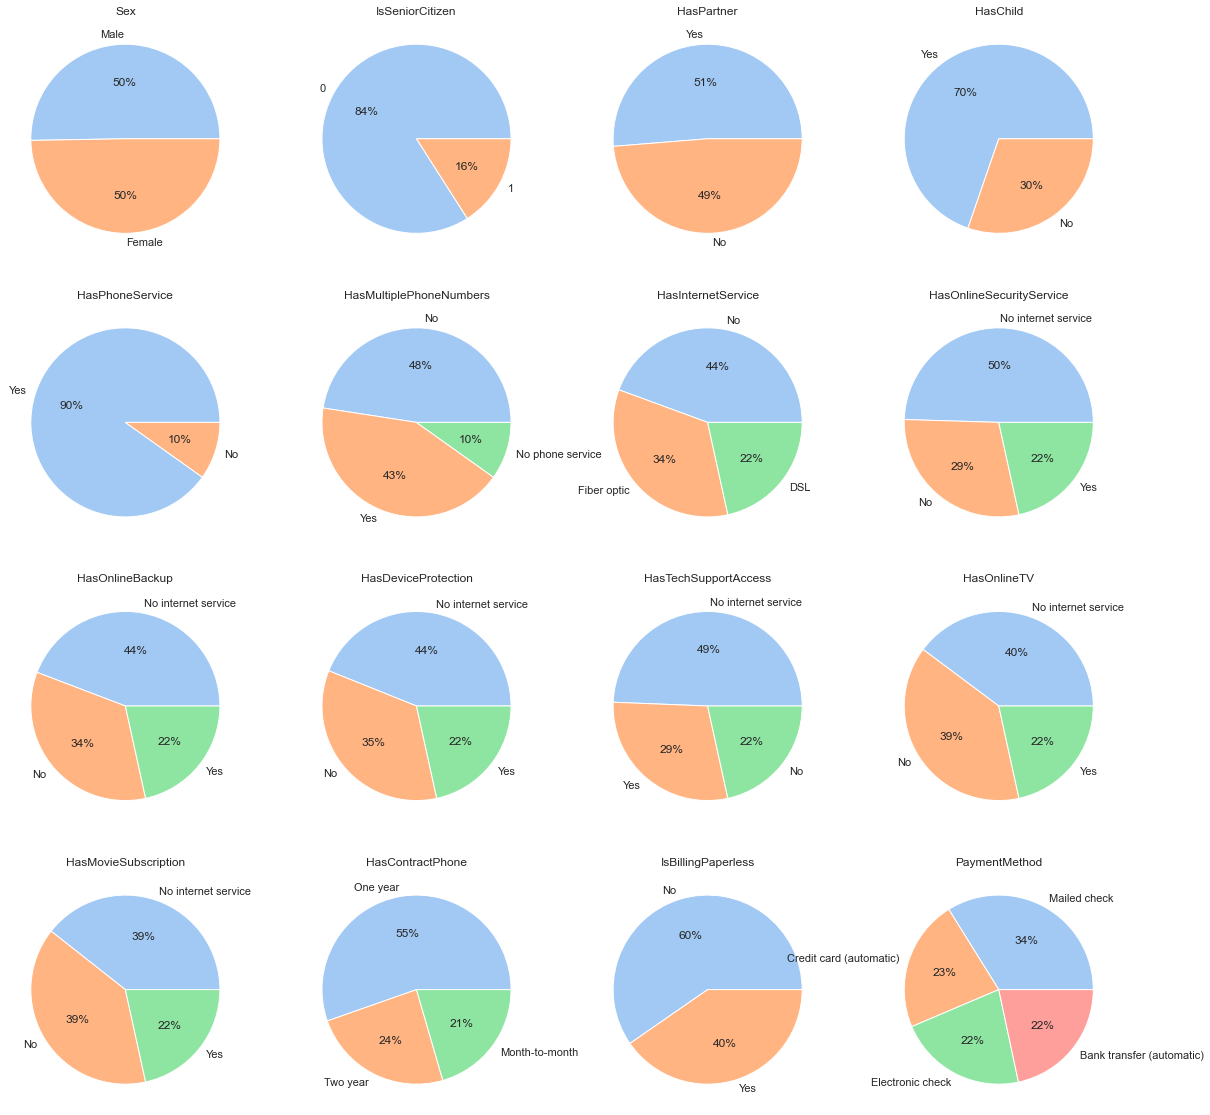

In [71]:
# Строим круговые диаграммы для каждого категориального признака
plt.figure(figsize=(20, 20))

for i, feature in enumerate(cat_cols):
    ax = plt.subplot(4, 4, i + 1)
    
    colors = sns.color_palette('pastel')[0:5]
    plt.pie(data[feature].value_counts(), labels=pd.unique(data[feature].values), colors=colors, autopct='%.0f%%')
    
    plt.title(feature)
    
plt.show()

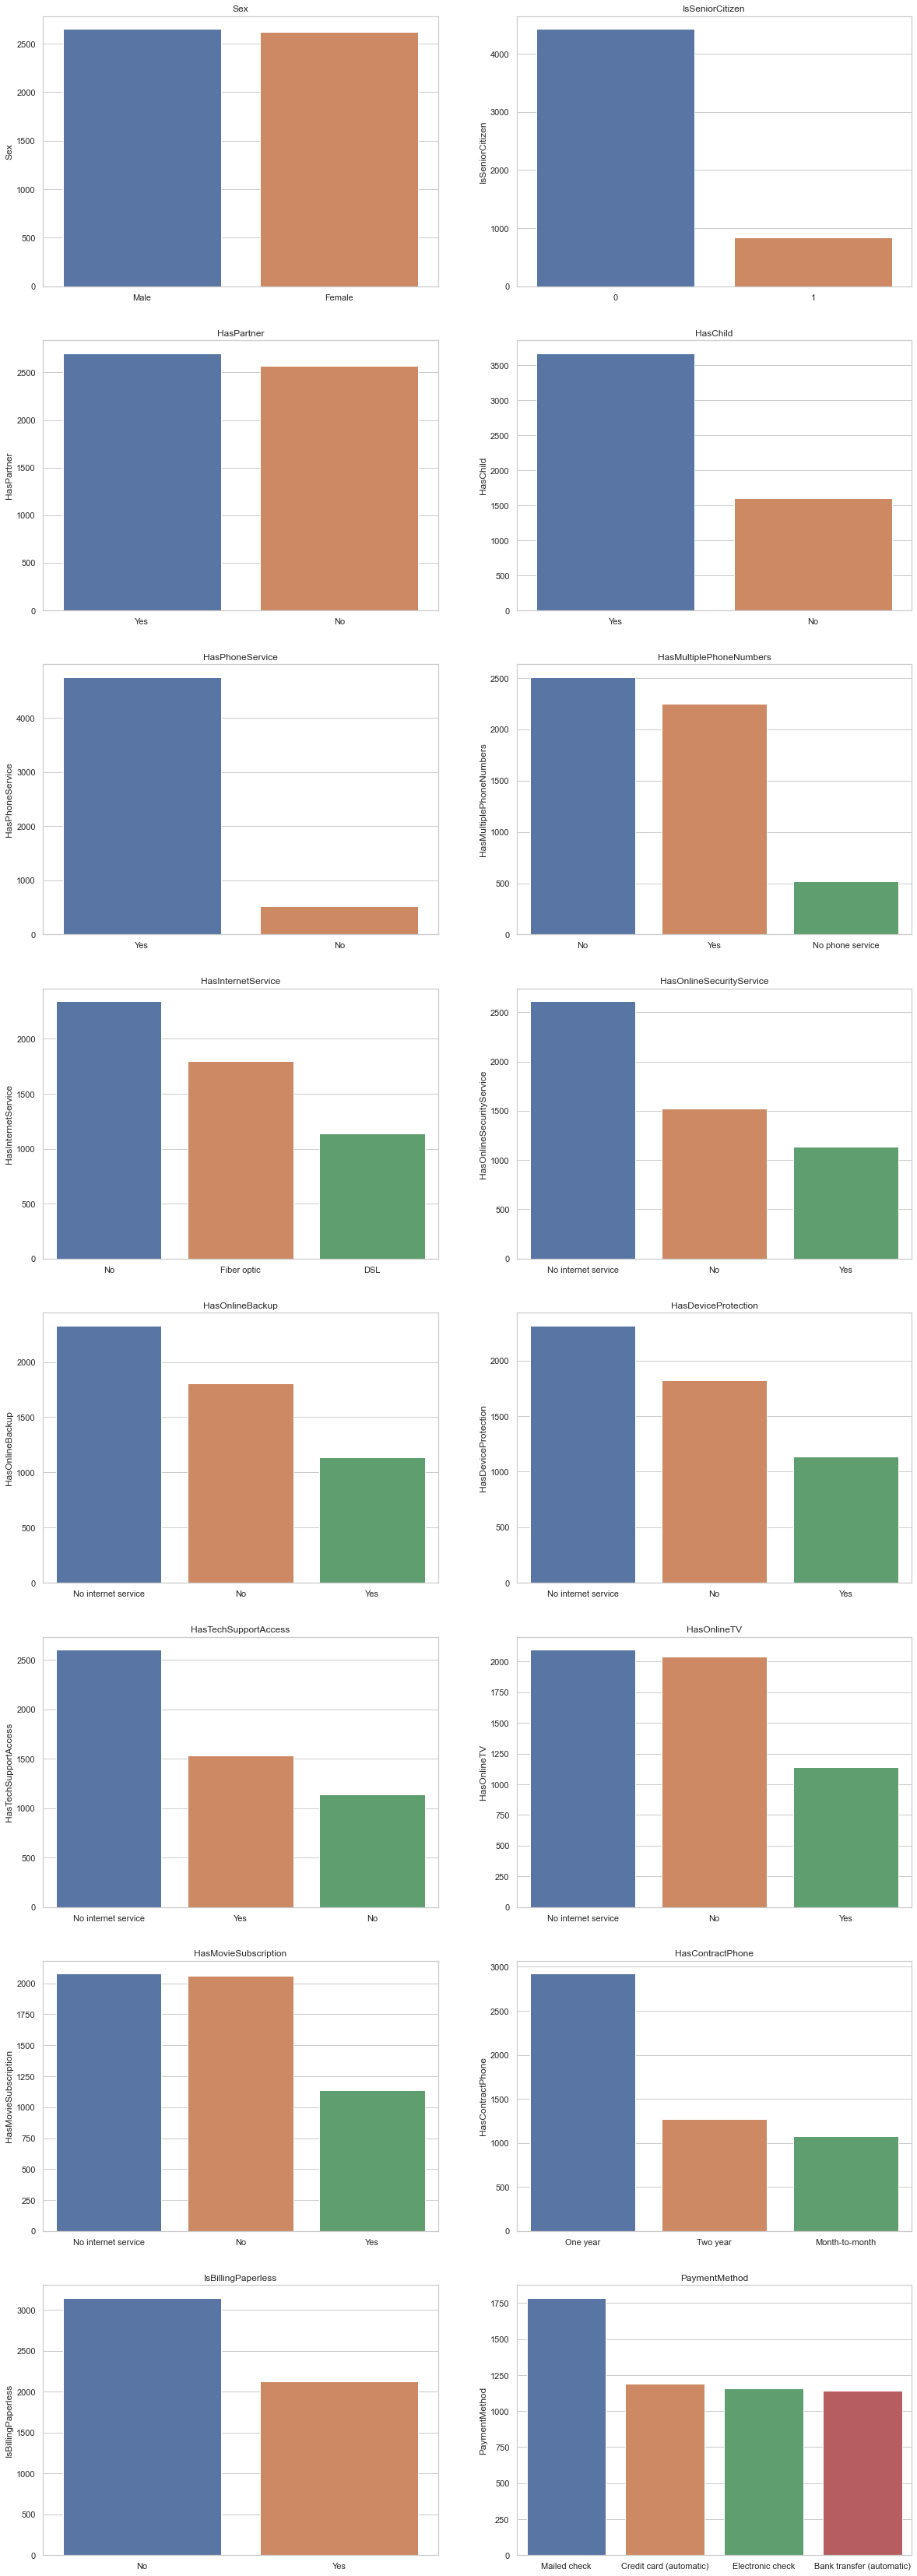

In [72]:
# Строим bar-диаграммы для каждого категориального признака
plt.figure(figsize=(20, 60))

for i, feature in enumerate(cat_cols):
    ax = plt.subplot(8, 2, i + 1)
    
    #plt.bar(pd.unique(data[feature].values), height=data[feature].value_counts())
    sns.barplot(x=pd.unique(data[feature].values), y=data[feature].value_counts(), data=cat_data)
    
    plt.title(feature)
    
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

### Распределение целевой переменной

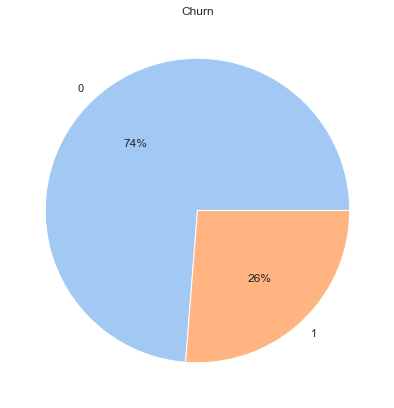

In [73]:
plt.figure(figsize=(7, 7))

colors = sns.color_palette('pastel')[0:5]
plt.pie(data[target_col].value_counts(), labels=pd.unique(data[target_col].values), colors=colors, autopct='%.0f%%')
plt.title(target_col)

plt.show()

Вывод: Классы довольно сильно несбалансированы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [74]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve

### Кодирование категориальных признаков

К категориальными признакам применим One-hot-encoding

In [75]:
dummy_features = pd.get_dummies(data[cat_cols])

### Нормировка числовых признаков

In [76]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
norm_num_data = pca.fit_transform(data[num_cols])
norm_num_data = pd.DataFrame(norm_num_data, columns=num_cols)

### Разделение данных и обучение моделей
Попробуем реализовать оба способа и посмотрим, какой лучше

In [77]:
# Выделим обучающую выборку с номализованными числовыми и закодированными категориальными признаками
X = pd.concat([norm_num_data, dummy_features], axis=1)
X

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.919099,-1.506436,-0.557582,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,1.612060,-1.295997,-0.184763,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,-1.282072,0.362658,-0.976504,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,-0.018437,0.475334,0.122800,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,1.122911,1.666716,1.968909,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,-1.200547,-1.145210,-0.973749,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
5269,0.715287,-0.679594,-0.045372,0,0,1,0,1,1,0,...,0,0,1,0,0,1,1,0,0,0
5270,-1.282072,-0.328310,-0.985693,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
5271,-0.140724,0.365972,-0.033560,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [78]:
from sklearn.model_selection import train_test_split

#Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

#### Обучение с помощью LogisticRegressionCV

In [79]:
#Обучение с помощью LogisticRegressionCV
LogRegCV = LogisticRegressionCV(scoring='roc_auc', refit=True)
LogRegCV.fit(X_train, y_train)

#Проверка качества
print(roc_auc_score(y_test, LogRegCV.predict(X_test)))
print('C:', LogRegCV.get_params()['Cs'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7132224581269168
C: 10


#### Обучение с помощью GridSearchCV

In [81]:
from sklearn.compose import ColumnTransformer

#Получим список номеров колонок с категориальными и числовыми признаками
numeric_indices = [i for i, column in enumerate(feature_cols) if column in num_cols]
categorical_indices = [i for i, column in enumerate(feature_cols) if column in cat_cols]



#Для разных колонок используесть разная предобработка, поэтому будем использовать ColumnTransformer
#В каждый кортеж transformers передаем название преобразования, трансформер и индексы колонок, к которым хотим примениить трансформер
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_indices),
        ('cat', OneHotEncoder(), categorical_indices)
    ],
    remainder='passthrough'
)

#Создаем Pipeline
pipe = make_pipeline(
    preprocessor,
    LogisticRegression()
)

In [82]:
#Передаем Pipeline в GridSearchCV
LogRegGridSearchCV = GridSearchCV(pipe, 
                               param_grid=[{'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]}],
                               cv=5,
                               scoring='roc_auc')

LogRegGridSearchCV = LogRegGridSearchCV.fit(X_train, y_train)

print(roc_auc_score(y_test, LogRegGridSearchCV.predict(X_test)))
print(LogRegGridSearchCV.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.7132224581269168
{'logisticregression__C': 10}


И в первом, и во втором методе результаты вышли идентичными. AUC_ROC получился 0.713, а лучший пареметр С для регрессии - 10.

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [83]:
import catboost

In [84]:
from sklearn.model_selection import train_test_split

#Разделение данных
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols].values, data[target_col].values, 
                                                    train_size=0.8,
                                                    random_state=42)

In [85]:
#Список индексов колонок с категориальных признаков
categorical_indices =  np.array([i for i, column in enumerate(feature_cols) if column in cat_cols])

#Обучение модели
boosting_model = catboost.CatBoostClassifier(n_estimators=500, silent=True,
                                             learning_rate=0.008,
                                             cat_features=categorical_indices,
                                             eval_metric='AUC')

boosting_model.fit(X_train, y_train)

y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

print('AUC_ROC score:', roc_auc_score(y_test, y_test_predicted))

AUC_ROC score: 0.8410662892191555


Результаты и параметры модели:
- AUC_ROC score: 0.8410662892191555
- learning_rate=0.008
- n_estimators=500

# Предсказания

In [61]:
categorical_indices =  np.array([i for i, column in enumerate(feature_cols) if column in cat_cols])

best_model = catboost.CatBoostClassifier(n_estimators=500, silent=True,
                                             learning_rate=0.008,
                                             cat_features=categorical_indices,
                                             eval_metric='AUC')

In [62]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = boosting_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.